In [203]:
import numpy as np
import pandas as pd
import requests
from pykrx import stock
import time
from datetime import datetime

In [204]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
stock_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="ALL")})
stock_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))

In [205]:
stock_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="ALL")})
stock_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))

In [206]:
stock_list.head()

,종목코드,종목명
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


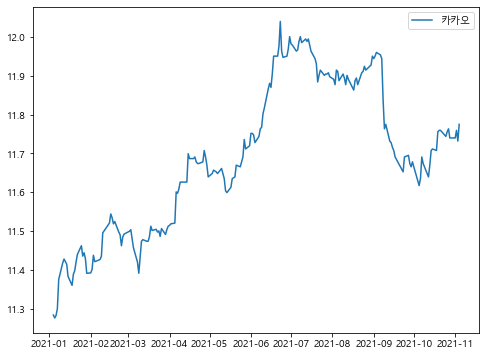

In [207]:
name = '카카오'
fromdate = str(20210101)
todate = str(20211104)

ticker1 = stock_list.loc[stock_list['종목명']== name, '종목코드']
df1 = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker1)

data = np.log(df1['종가'])

plt.figure(figsize=(8, 6))
plt.plot(data)
plt.legend([f'{name}'])
plt.show()

In [208]:
seri = df1['종가']

In [209]:
df = pd.DataFrame(seri, columns=['종가','일계도','이계도','일계도부호','이계도부호'])
df.head()

,종가,일계도,이계도,일계도부호,이계도부호
날짜,,,,,
2021-01-04,79483,NaN,NaN,NaN,NaN
2021-01-05,78881,NaN,NaN,NaN,NaN
2021-01-06,79383,NaN,NaN,NaN,NaN
2021-01-07,80788,NaN,NaN,NaN,NaN
2021-01-08,87111,NaN,NaN,NaN,NaN


In [210]:
df['일계도'][0] = 0
df.head()


C:\Users\ghdak\AppData\Local\Temp/ipykernel_21136/829604211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도'][0] = 0


,종가,일계도,이계도,일계도부호,이계도부호
날짜,,,,,
2021-01-04,79483,0,NaN,NaN,NaN
2021-01-05,78881,NaN,NaN,NaN,NaN
2021-01-06,79383,NaN,NaN,NaN,NaN
2021-01-07,80788,NaN,NaN,NaN,NaN
2021-01-08,87111,NaN,NaN,NaN,NaN


In [211]:
for i in range(1, len(seri)):
    df['일계도'][i] = df['종가'][i] - df['종가'][i-1]
df.head()

C:\Users\ghdak\AppData\Local\Temp/ipykernel_21136/3311632609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도'][i] = df['종가'][i] - df['종가'][i-1]


,종가,일계도,이계도,일계도부호,이계도부호
날짜,,,,,
2021-01-04,79483,0,NaN,NaN,NaN
2021-01-05,78881,-602,NaN,NaN,NaN
2021-01-06,79383,502,NaN,NaN,NaN
2021-01-07,80788,1405,NaN,NaN,NaN
2021-01-08,87111,6323,NaN,NaN,NaN


In [212]:
df['이계도'][0] = 0
for i in range(1, len(seri)):
    df['이계도'][i] = df['일계도'][i] - df['일계도'][i-1]
df.head()

C:\Users\ghdak\AppData\Local\Temp/ipykernel_21136/3300555474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이계도'][0] = 0
C:\Users\ghdak\AppData\Local\Temp/ipykernel_21136/3300555474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이계도'][i] = df['일계도'][i] - df['일계도'][i-1]


,종가,일계도,이계도,일계도부호,이계도부호
날짜,,,,,
2021-01-04,79483,0,0,NaN,NaN
2021-01-05,78881,-602,-602,NaN,NaN
2021-01-06,79383,502,1104,NaN,NaN
2021-01-07,80788,1405,903,NaN,NaN
2021-01-08,87111,6323,4918,NaN,NaN


In [213]:
for i in range(len(df)):
    if df['일계도'][i] >= 0:
        df['일계도부호'][i] = 1
    else:
        df['일계도부호'][i] = 0

C:\Users\ghdak\AppData\Local\Temp/ipykernel_21136/2770070508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도부호'][i] = 1
C:\Users\ghdak\AppData\Local\Temp/ipykernel_21136/2770070508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일계도부호'][i] = 0


In [214]:
for i in range(len(df)):
    if df['이계도'][i] >= 0:
        df['이계도부호'][i] = 1
    else:
        df['이계도부호'][i] = 0

C:\Users\ghdak\AppData\Local\Temp/ipykernel_21136/3065516705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이계도부호'][i] = 1
C:\Users\ghdak\AppData\Local\Temp/ipykernel_21136/3065516705.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['이계도부호'][i] = 0


In [215]:
df.head(10)

,종가,일계도,이계도,일계도부호,이계도부호
날짜,,,,,
2021-01-04,79483,0,0,1,1
2021-01-05,78881,-602,-602,0,0
2021-01-06,79383,502,1104,1,1
2021-01-07,80788,1405,903,1,1
2021-01-08,87111,6323,4918,1,1
2021-01-11,90924,3813,-2510,1,0
2021-01-12,91827,903,-2910,1,0
2021-01-13,91225,-602,-1505,0,0
2021-01-14,90623,-602,0,0,1


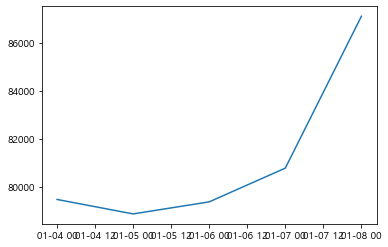

In [216]:
plt.plot(df['종가'].head())

In [217]:
df.head(10)

,종가,일계도,이계도,일계도부호,이계도부호
날짜,,,,,
2021-01-04,79483,0,0,1,1
2021-01-05,78881,-602,-602,0,0
2021-01-06,79383,502,1104,1,1
2021-01-07,80788,1405,903,1,1
2021-01-08,87111,6323,4918,1,1
2021-01-11,90924,3813,-2510,1,0
2021-01-12,91827,903,-2910,1,0
2021-01-13,91225,-602,-1505,0,0
2021-01-14,90623,-602,0,0,1


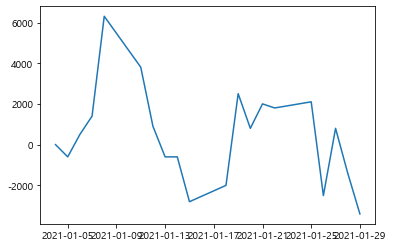

In [218]:
plt.plot(df['일계도'][:20])

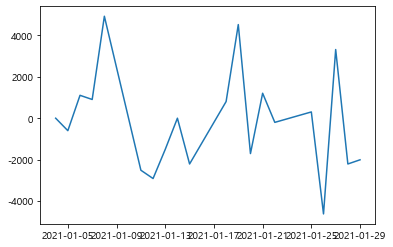

In [219]:
plt.plot(df['이계도'][:20])

In [220]:
df['일계도부호'][0:20]  #series

날짜
2021-01-04    1
2021-01-05    0
2021-01-06    1
2021-01-07    1
2021-01-08    1
2021-01-11    1
2021-01-12    1
2021-01-13    0
2021-01-14    0
2021-01-15    0
2021-01-18    0
2021-01-19    1
2021-01-20    1
2021-01-21    1
2021-01-22    1
2021-01-25    1
2021-01-26    0
2021-01-27    1
2021-01-28    0
2021-01-29    0
Name: 일계도부호, dtype: object

In [221]:
df_diff2 = df['일계도부호']

In [222]:
df_diff2 = np.array(df_diff2)

In [223]:
df_diff2.shape

(208,)

In [224]:
traing_x = [df_diff2[i:i+40] for i in range(120)]
traing_y = [df_diff2[i+41] for i in range(120)]

In [225]:
import pickle
# 선형회귀 모델
from sklearn import linear_model
# 학습 데이터와 테스트 데이터를 나눠주는 모듈
from sklearn.model_selection import train_test_split
# 모델을 평가해주는 모듈
from sklearn.metrics import mean_absolute_error

In [226]:
# 3. 데이터 분석 : 선형 회귀 모델
model = linear_model.LinearRegression()

In [227]:
model.fit(traing_x, traing_y)

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\sklearn\utils\validation.py:956: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


LinearRegression()

In [228]:
test_x = [df_diff2[i:i+40] for i in range(120,160)]
test_y =  [df_diff2[i+41] for i in range(120,160)]

In [229]:
pred_y = model.predict(test_x)
pred_y

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\sklearn\base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([0.84229932, 1.09175064, 1.30198873, 0.61920737, 0.80293977,
       0.60787939, 0.78779475, 0.29334979, 0.57908163, 0.68646089,
       1.46830597, 1.10800894, 0.81093609, 1.51647765, 1.01436877,
       0.39239765, 0.88723088, 0.55425329, 0.6286638 , 0.8125047 ,
       0.73659569, 0.28318897, 0.61847111, 0.98921399, 0.44975509,
       0.37734687, 0.83022735, 0.75782118, 0.6964129 , 0.74441408,
       0.66217379, 0.9084987 , 0.92684982, 0.66278764, 0.84317991,
       0.82773616, 1.53827178, 0.94352057, 0.62261495, 0.70745032])

In [230]:
trans_pred = pred_y.copy()
for i in range(len(pred_y)):
    if pred_y[i] < 0.7:
        trans_pred[i] = 0
    else:
        trans_pred[i] = 1

In [231]:
from sklearn.metrics import mean_squared_error

In [232]:
mae = mean_absolute_error(test_y, trans_pred)
mse = mean_squared_error(test_y, trans_pred)
round(mae, 2), round(mse, 2)

(0.28, 0.28)

In [233]:
test_y[:20]

[1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]

In [234]:
trans_pred[:20]

array([1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1.])